In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import import_ipynb
from preprocessing import load_data,clean_data, preprocessing,vectorize, split_data

In [17]:
df = load_data("Phishing_Email.csv")
df = clean_data(df)
df['Email Text'] = df['Email Text'].apply(preprocessing)
tf,X,y = vectorize(df)
X_train, X_test, y_train, y_test = split_data(X, y)

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
print(f"Doğruluk Oranı: {accuracy_score(y_test, y_pred):.4f}")
print("\nSınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, target_names=["Phishing", "Safe"]))

Doğruluk Oranı: 0.9576

Sınıflandırma Raporu:

              precision    recall  f1-score   support

    Phishing       0.92      0.98      0.95      1518
        Safe       0.99      0.94      0.96      2209

    accuracy                           0.96      3727
   macro avg       0.95      0.96      0.96      3727
weighted avg       0.96      0.96      0.96      3727



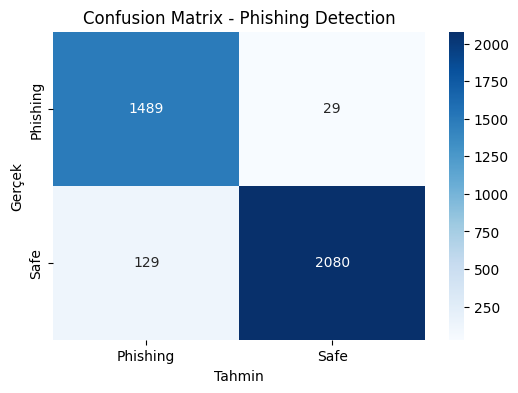

In [20]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Phishing", "Safe"],
            yticklabels=["Phishing", "Safe"])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Phishing Detection")
plt.show()